In [78]:
# Package imports for this notebook 
import os # package to traverse the directories on your computer
import pandas as pd # dataframe reading, writing, and manipulation
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library 

In [89]:
# Path to data
# Change directories to path
#data_path = "/Users/umreenimam/Documents/BMCC/Lesson Materials/Weeks 3 - 4/Week 3 Lab"
# "C:\Users\riyah\Downloads\public_emdat_project.xlsx"
#data_path = "/Users/riyah/Downloads"
data_path = "/Users/riyah/Downloads"
os.chdir(data_path)

In [90]:
# Import data
df = pd.read_excel("public_emdat_project.xlsx")
#df = pd.read_csv("Weather Data.csv", sep = ",")

In [91]:
# Inspect shape
print("\nThe shape of the data:")
print(df.shape)
print("\n")

# Inspect columns
print("\nList all columns:")
print(df.columns)



The shape of the data:
(15784, 46)



List all columns:
Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage', 'Total Damage, Adjusted', 'CPI', 'Admin Units',
       'Entry Date', 'Last Update'],
      dtype='object')


In [82]:
# 1a. Display information of the dataset using df.info()
#the first few rows
print("Information of the dataset:")
print(df.info())

Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DisNo.                                     15784 non-null  object        
 1   Historic                                   15784 non-null  object        
 2   Classification Key                         15784 non-null  object        
 3   Disaster Group                             15784 non-null  object        
 4   Disaster Subgroup                          15784 non-null  object        
 5   Disaster Type                              15784 non-null  object        
 6   Disaster Subtype                           15784 non-null  object        
 7   External IDs                               2405 non-null   object        
 8   Event Name                                 4955 non-null   object   

In [83]:
#1b. count how many null values are present in each column and display those counts
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0

In [84]:
# 1c. print the summary statistics for the entire data frame
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
       AID Contribution ('000 US$)     Magnitude     Latitude    Longitude  \
count                 4.900000e+02  3.378000e+03  1815.000000  1815.000000   
mean                  2.851070e+04  6.006125e+04    16.464334    42.139949   
min                   3.000000e+00 -5.700000e+01   -72.640000  -172.095000   
25%                   1.660000e+02  7.600000e+00     1.102500     0.859500   
50%                   7.665000e+02  1.900000e+02    18.590000    54.448200   
75%                   4.951000e+03  2.049750e+04    34.816500   103.099000   
max                   3.518530e+06  4.000000e+07    67.930000   179.650000   
std                   2.116816e+05  7.412252e+05    21.776287    75.535413   

         Start Year   Start Month     Start Day      End Year     End Month  \
count  15784.000000  15715.000000  14275.000000  15784.000000  15622.000000   
mean    2010.590155      6.448616     15.361331   2010.621706      6.572782   
min     2000.00000

In [85]:
#1d. fill in missing values using the median. 
#show how many null values are present after handling missing values

# # Example: Fill missing values in numeric columns with the median
df.fillna(df.median(numeric_only = True), inplace = True)

# View count of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0

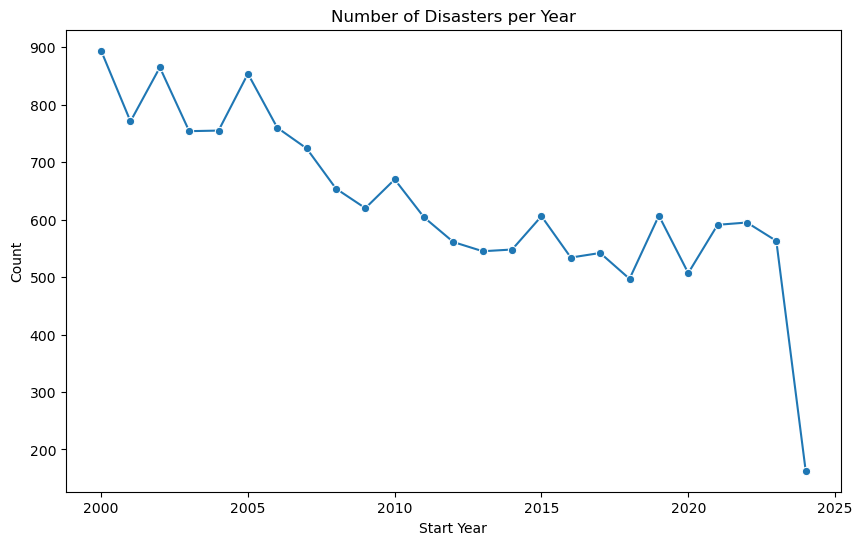

In [105]:
#Part 2 - Plotly visualizations
#2a create a visual that shows the top 10 disaster counts per year

# Get the number of disasters per year by grouping by "Start Year"
# and counting how many times each year appears across the dataset

disaster_per_year = df.groupby("Start Year").agg(Count = pd.NamedAgg("Start Year", "count")).sort_values("Start Year").reset_index(drop = False)
disaster_per_year

# Number of disasters per year line plot
plt.figure(figsize = (10, 6))
sns.lineplot(data = disaster_per_year, x = "Start Year", y = "Count", marker = "o")
plt.title('Number of Disasters per Year')
plt.show()

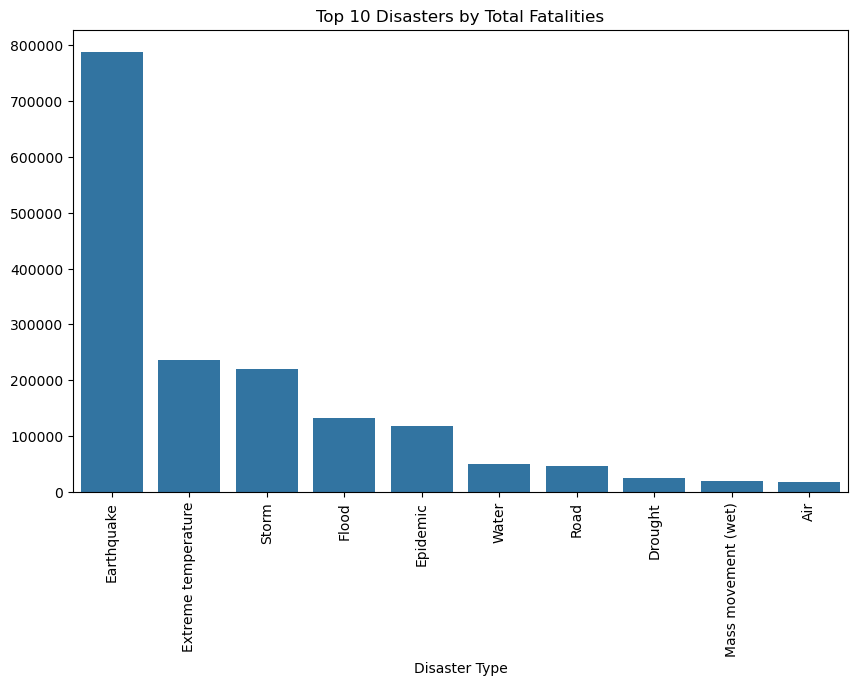

In [107]:
#2b. create a visual tat shows top 10 disasters by total fatalities
# Visualize the top 10 disasters by fatalities
top_disasters = df.groupby('Disaster Type')['Total Deaths'].sum().nlargest(10)
plt.figure(figsize = (10, 6))
sns.barplot(x = top_disasters.index, y = top_disasters.values)
plt.title('Top 10 Disasters by Total Fatalities')
plt.xticks(rotation = 90)
plt.show()

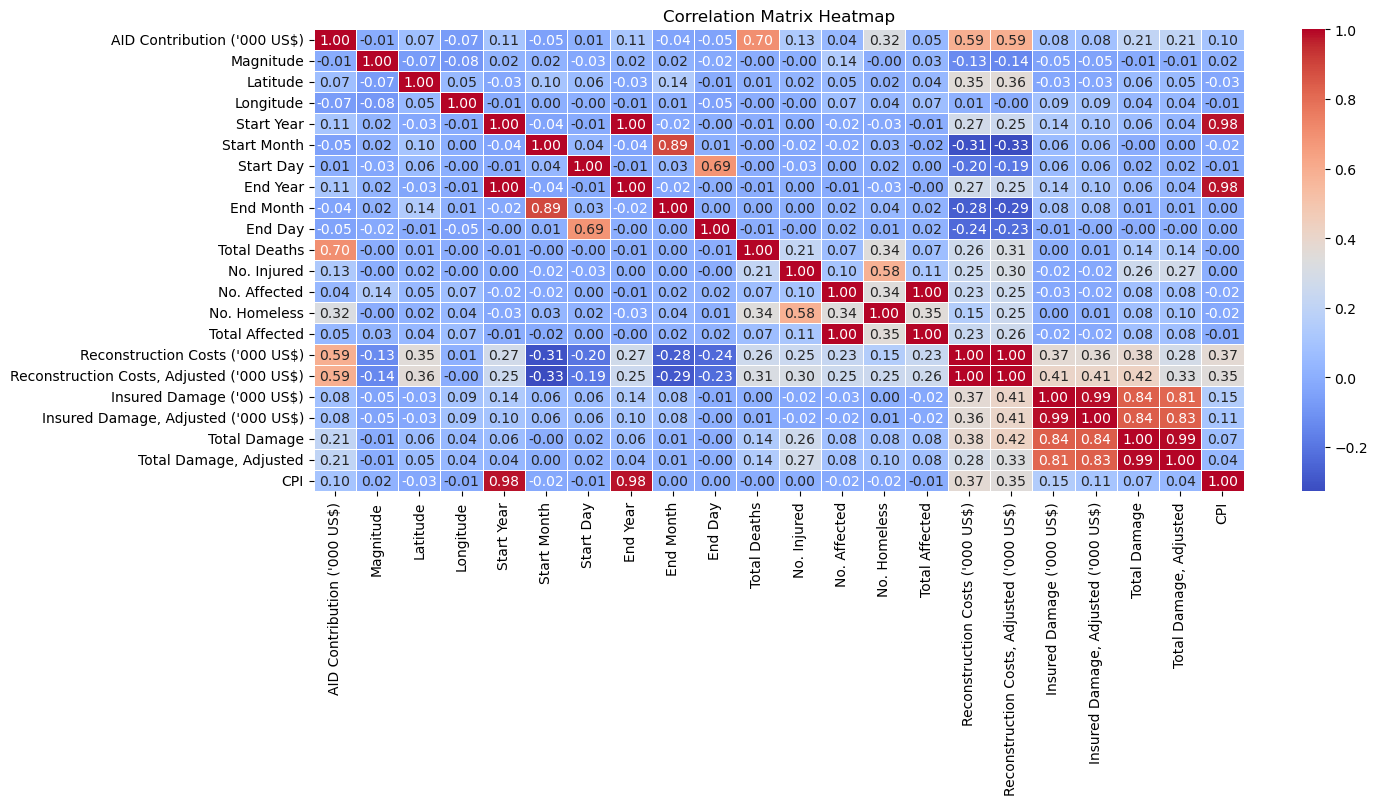

In [109]:
#2c create a correlation matrix heatmap
# Only run the .corr() function on numeric values
numeric_df = df.select_dtypes(include = ["number"])

# Create plot
plt.figure(figsize=(15, 6))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


#2ci describe 3 things you notice
#1)columns containing information regarding damage are strongly correlated (ex. total damage, insured damage)
#2) start year and CPI have a strong correlation
#3) start year and end year have a strong correlation


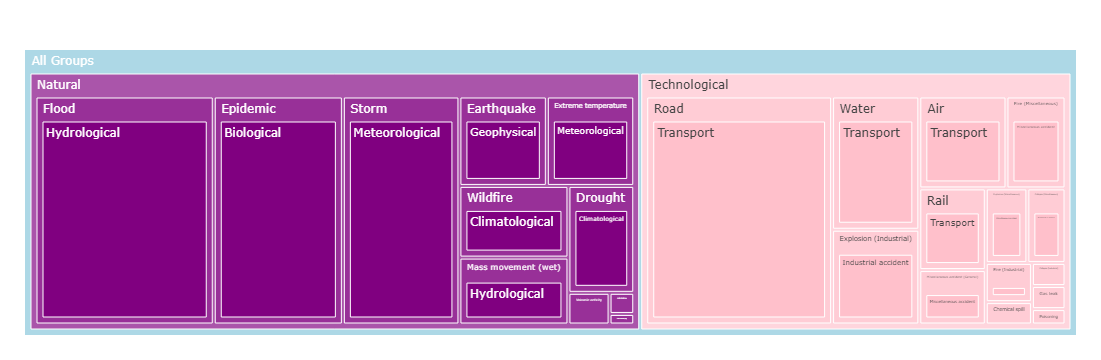

In [159]:
#2d create a treemap using hierarchical columns you would like to explore

import plotly.express as px
year_filter = df[df["Start Year"] == 2000]
year_filter.shape

year_filter.columns




# Skip columns like latitude, longitude, etc. 
skip_cols = ["Latitude", "Longitude", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day"]

# Get a list of columns to fill excluding the skipped columns 
#fill_cols = df.columns.difference(skip_cols)
fill_cols = df.columns.difference(skip_cols)
df[fill_cols] = df[fill_cols].apply(lambda x: x.fillna(x.median()) if x.dtype in ['float64', 'int64'] else x)

#'DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
 #      'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
  #    'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
   #    'Declaration', 'AID Contribution ('000 US$)','Start Day', 'End Year', 'End Day',
    #   'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
     #  'Total Affected', 'Reconstruction Costs ('000 US$)',
#       'Reconstruction Costs, Adjusted ('000 US$)',
 #      'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
  #     'Total Damage', 'Total Damage, Adjusted', 'CPI'


year_filter_grouped = year_filter.groupby(["Disaster Type", "Disaster Group", "Disaster Subgroup"]).agg(Group_Count = pd.NamedAgg("Disaster Group", "size")).sort_values("Group_Count", ascending = False).reset_index(drop = False)
year_filter_grouped

# year_filter_grouped = year_filter.groupby(["Disaster Type", "Disaster Group", "Disaster Subgroup"]).agg(Group_Count = pd.NamedAgg("Disaster Group", "size")).sort_values("Group_Count", ascending = False).reset_index(drop = False)
# year_filter_grouped

treemap = px.treemap(year_filter_grouped, 
                     path = [px.Constant("All Groups"), "Disaster Group", "Disaster Type", "Disaster Subgroup"],
                     values = "Group_Count")

treemap.update_traces(root_color = "lightblue")
treemap.update_layout(
    treemapcolorway = ["purple", "pink"],
    margin = dict(t = 50, l = 25, r = 25, b = 25),
    font_color = "white")
treemap.show()

#2di What do you notice about the hierarchical order? 
#I notice that each data type is categorized under another (Hydrological->Flood->Natural) until they all fall under the same category (subgroup->group->all groups")
#and the smaller the name is the more specific the data gets

In [147]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage', 'Total Damage, Adjusted', 'CPI', 'Admin Units',
       'Entry Date', 'Last Update'],
      dtype='object')

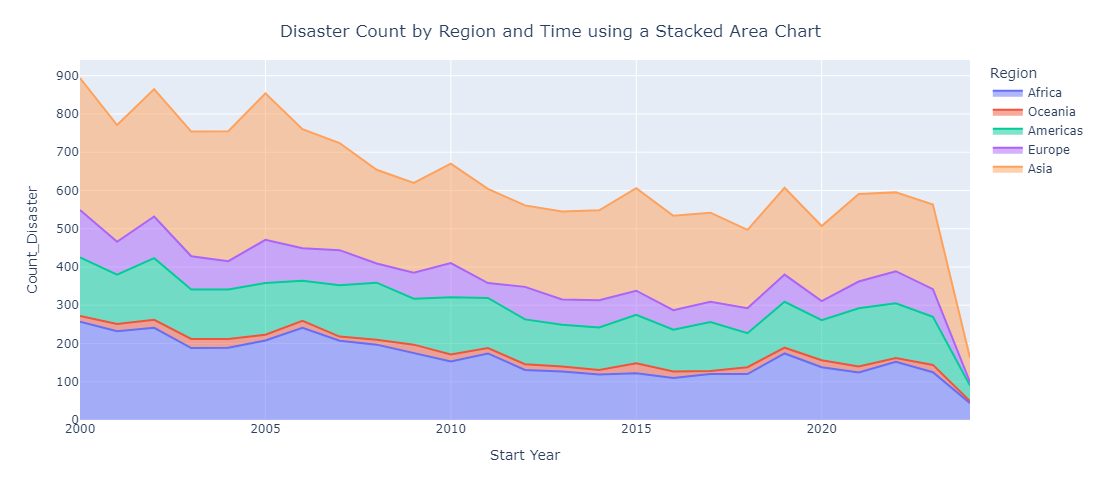

In [163]:
#2e Create a stacked area chart of columns of your choosing

df.columns
# Let's create a stacked area chart using the disasters dataset 
# Let's view how many disasters have a hit a region over time
country_grouped = df.groupby(["Region", "Start Year"]).agg(Count_Disaster = pd.NamedAgg("Country", "size")).sort_values("Start Year").reset_index(drop = False)

# Create stacked area chart
area_chart = px.area(country_grouped, color = "Region", x = "Start Year", y = "Count_Disaster", line_group = "Region", width = 700, height = 500)
area_chart.update_layout(title = {"text": "Disaster Count by Region and Time using a Stacked Area Chart", "y": 0.95, "x": 0.5, "xanchor": "center", "yanchor": "top"})
area_chart.show()

#2ei What do you notice? 
#the highest disaster counts were consistently in Asia

In [169]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ignore warnings while creating visuals
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Weather Data.csv", sep = ",")
df.head()

,Location,Season,Entry,Temp
0,City A,Spring,1,35.0
1,City B,Spring,1,35.0
2,City C,Spring,1,69.0
3,City A,Summer,1,78.0
4,City B,Summer,1,74.0


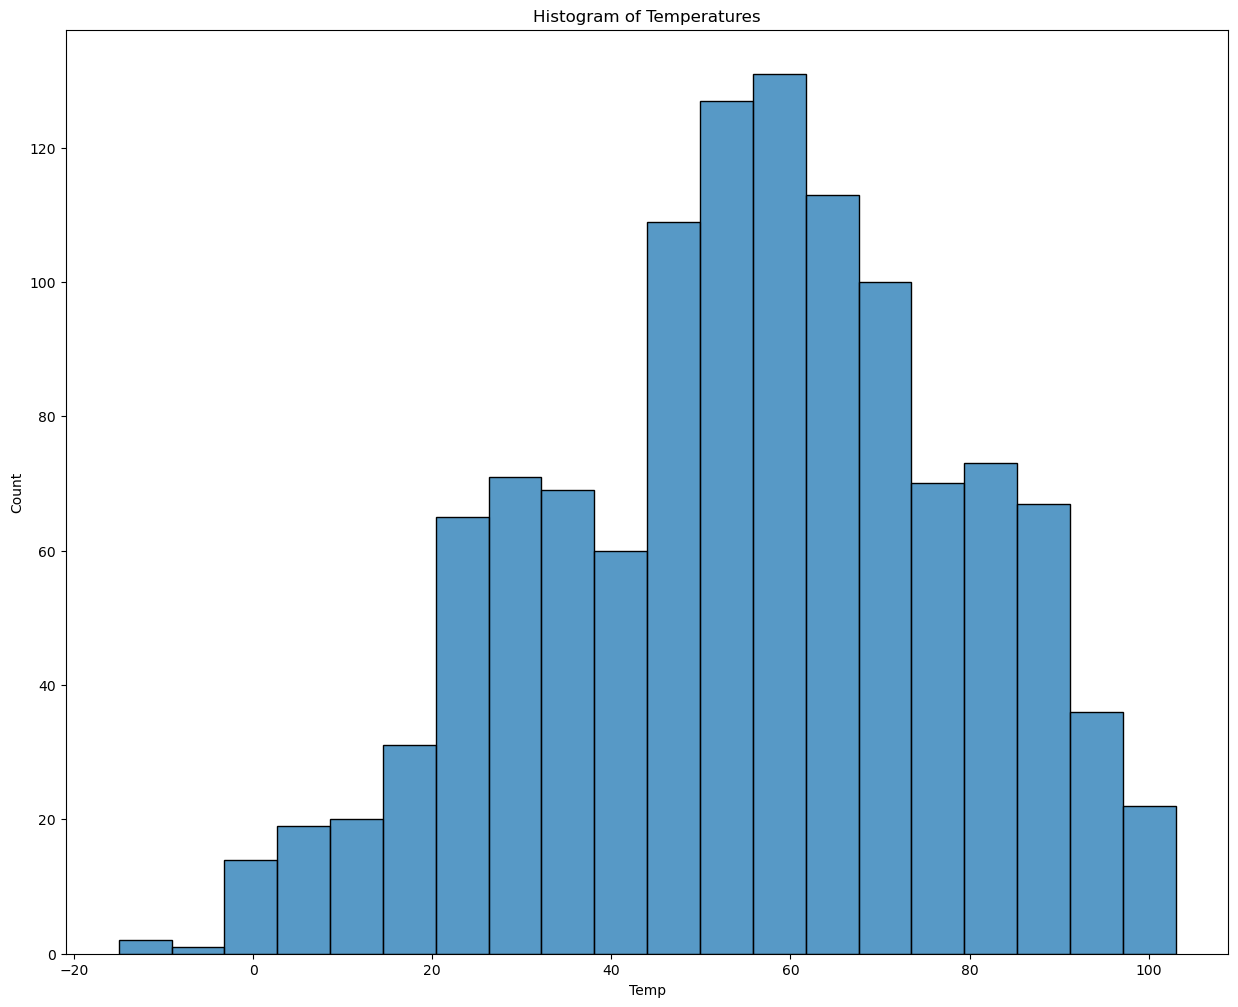

In [177]:
#3a Create a histogram to show the distribution of temperatures

# Make the seasons column a category 
df["Season"] = df["Season"].astype("category")

# Begin creation of histogram
plt.figure(figsize = (15, 12))
sns.histplot(df, x = "Temp")
plt.title("Histogram of Temperatures")
plt.show()

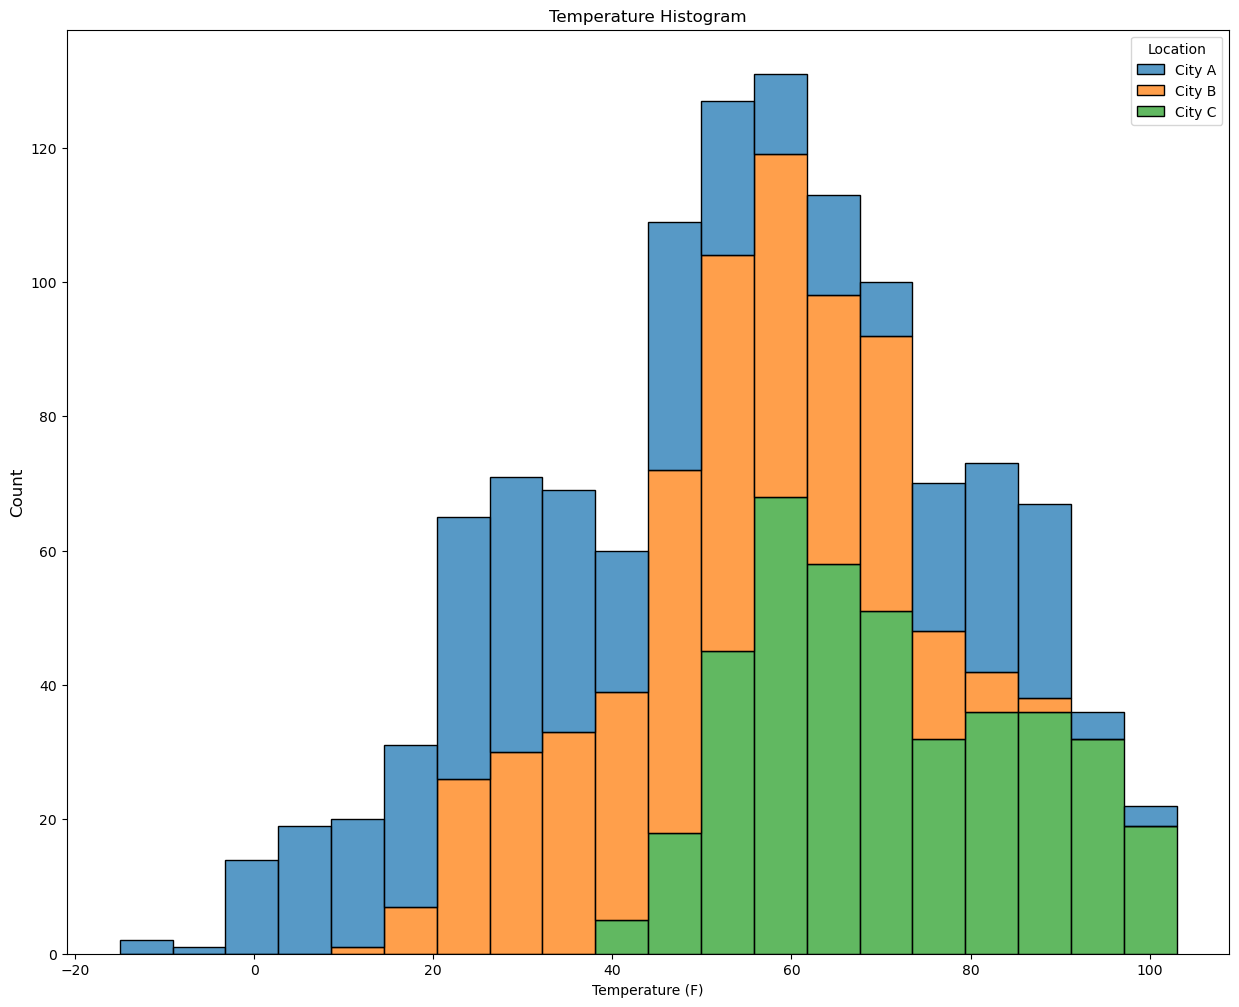

In [179]:
# Create the figure 
plt.figure(figsize = (15, 12))

# Generate histogram
sns.histplot(df, x = "Temp", hue = "Location", multiple = "stack")
plt.title("Temperature Histogram")
plt.xlabel("Temperature (F)")
plt.ylabel("Count", fontsize = 12)

plt.show()

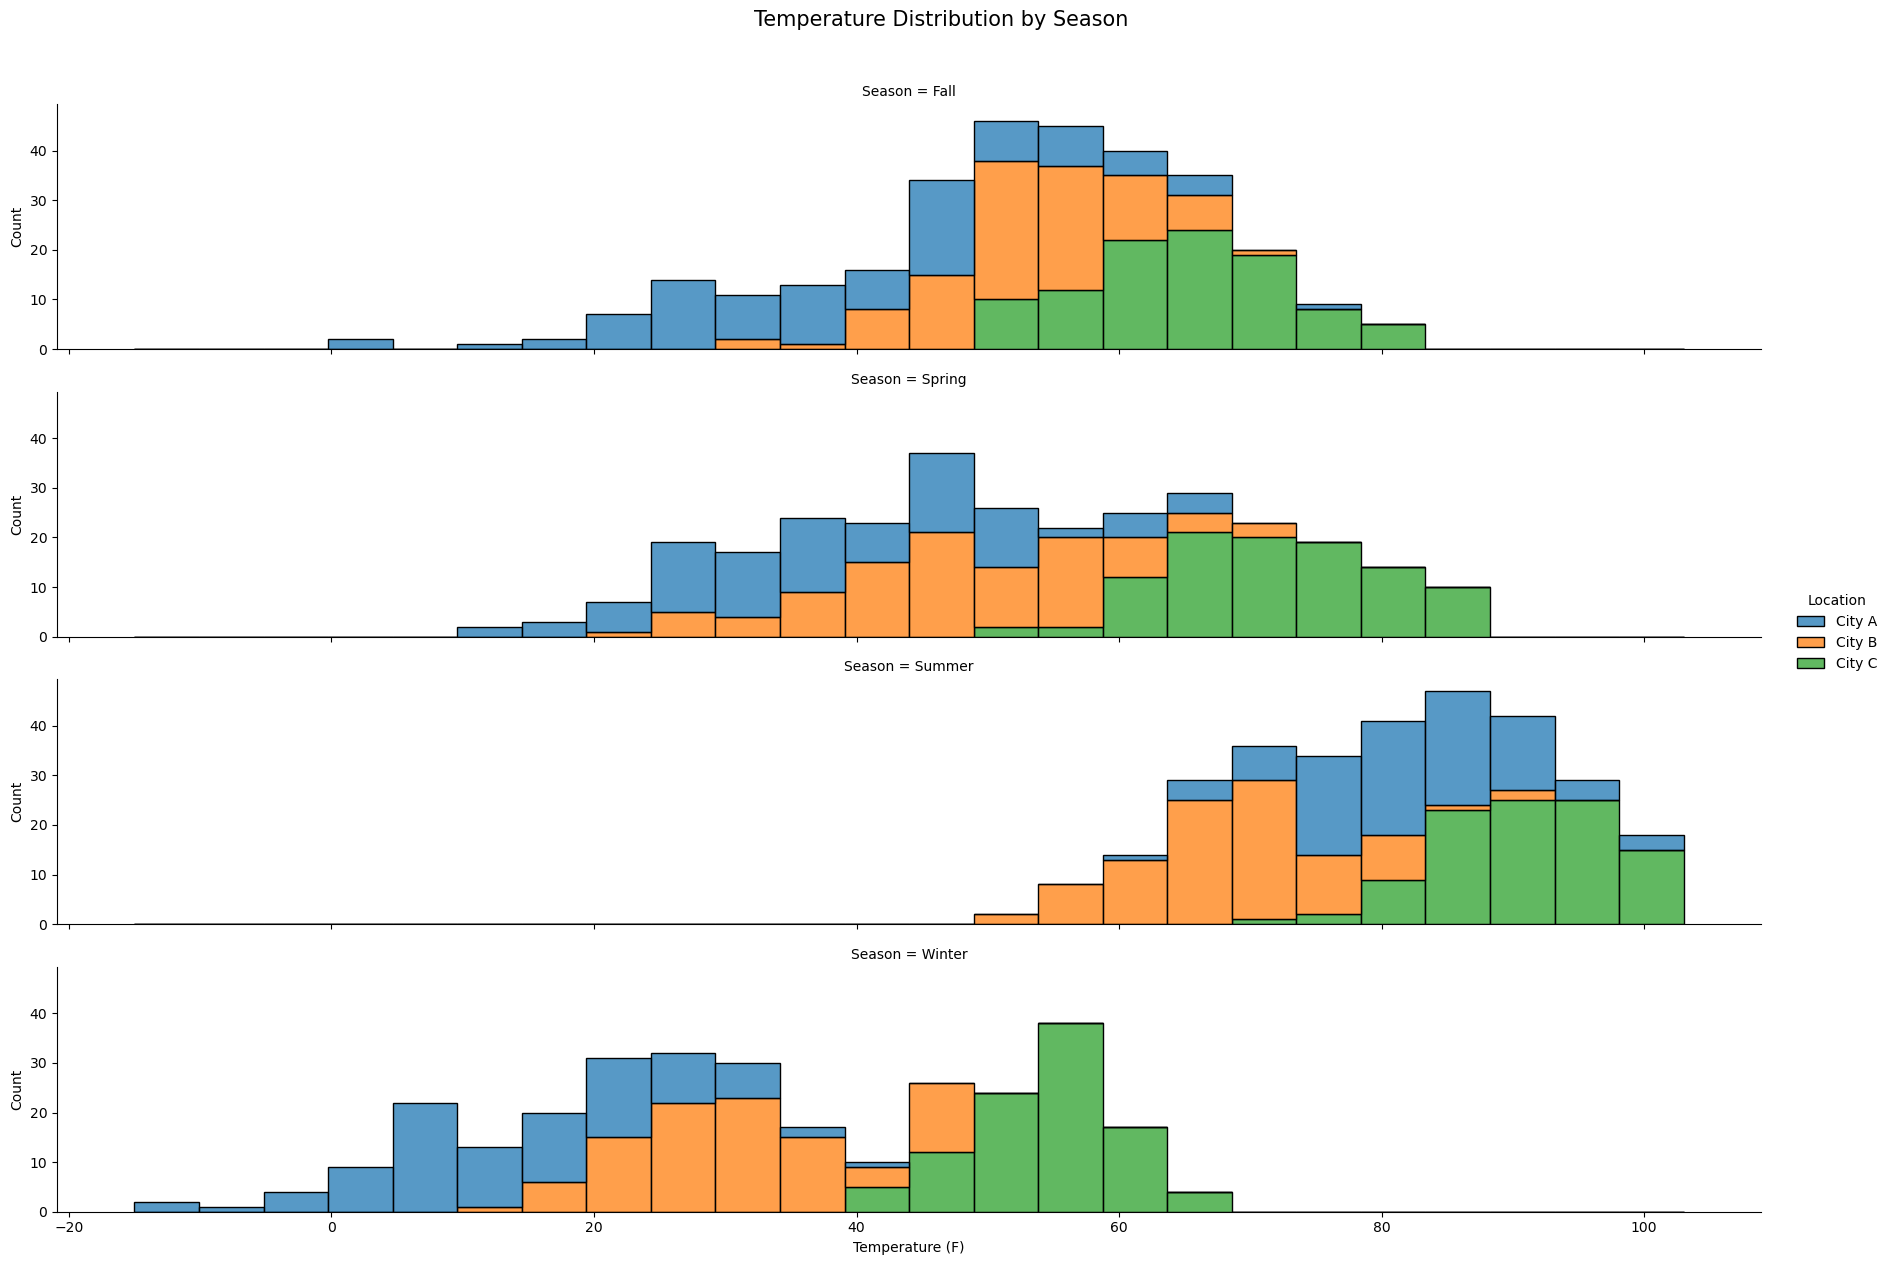

In [181]:
# Generate displot with attributes 
dist = sns.displot(df, x = "Temp", col = "Season", hue = "Location",
                   multiple = "stack", col_wrap = 1, binwidth = 5, height = 3, aspect = 6,
                   facet_kws = dict(margin_titles = True))

dist.figure.suptitle("Temperature Distribution by Season",
                     fontsize = 15, ha = "center",
                     x = 0.50, y = 1.05)

dist.set_axis_labels("Temperature (F)", "Count")

In [ ]:
#3aiHow is the data distributed?
#    it's categorized by measurement, season, and location
#3aiiWhat are the majority of temperatures shown? 
#    temperatures from city a

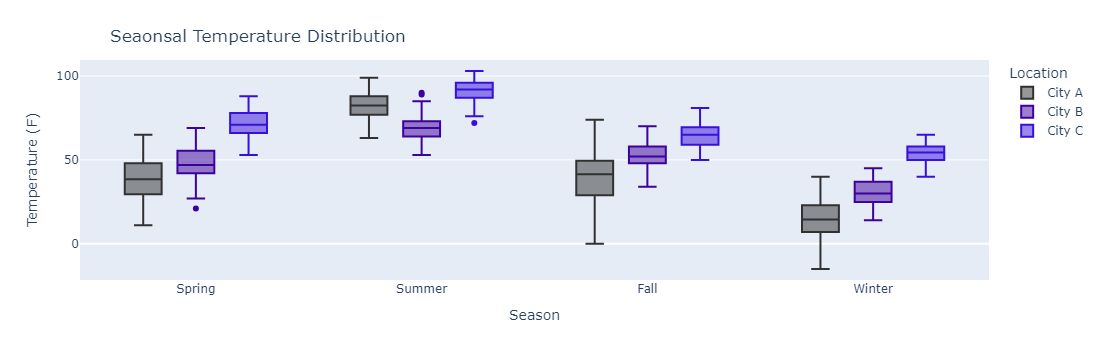

In [185]:
#3b Create a boxplot of the data and identify the following values

# Create figure and set color theme
boxplot = px.box(df, x = "Season", color = "Location", y = "Temp",
                 color_discrete_sequence = px.colors.cyclical.Edge)

# Update titles (main and axes) and format
boxplot.update_layout(title = {"text": "Seaonsal Temperature Distribution",
                               "xanchor": "left", "yanchor": "top", "x": 0.1}, 
                               legend_title_text = "Location", xaxis_title = "Season", yaxis_title = "Temperature (F)")

# Show plot
boxplot.show()

In [204]:
#3bi Max value
#     City C: 103 degrees F in summer 
#3bii Min value
#     City A: -15 degrees F in winter 


In [ ]:
#4Data encoding – DISASTERS DATASET 

#4a Encode 3 different categorical columns in this dataset using scikit-learn techniques, OneHotEncoding and OrdinalEncoding 
#4b Two different data frames should be created because of each technique 
